## 주제별로 EDA 분류

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = os.getenv('HOME') +'/aiffel/aiffelthon/'

In [3]:
os.listdir(directory+'meta')

['reg_1.json',
 'meta_data_included_raw_v2.csv',
 '.ipynb_checkpoints',
 'meta_eng_raw_0306_v1.csv',
 'kor_text.xlsx',
 'reg_3.json',
 'meta_data_included_raw.csv',
 'meta_data_raw_eng_match_6m.csv',
 'kor_text.txt',
 'meta_raw_eng_sts_v1.csv',
 'reg_4.json',
 'kw_t.json',
 'reg_5.json',
 'meta_data_raw_0306.csv',
 'reg_2.json']

In [4]:
df = pd.read_csv(directory + 'meta/meta_raw_eng_sts_v1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reg          949888 non-null  object 
 1   stdn         949888 non-null  object 
 2   dial         949888 non-null  object 
 3   eng          949888 non-null  object 
 4   eojeol_stdn  949888 non-null  object 
 5   sts          949888 non-null  float64
 6   sts_q        949888 non-null  object 
 7   title        949888 non-null  object 
 8   year         949888 non-null  object 
 9   date         949888 non-null  object 
 10  category     949706 non-null  object 
 11  topic        949888 non-null  object 
 12  age          949888 non-null  object 
 13  sex          949888 non-null  object 
 14  prin_res     949888 non-null  object 
 15  curr_res     949888 non-null  object 
 16  age2         659954 non-null  object 
 17  sex2         659954 non-null  object 
 18  prin_res2    659954 non-

# seq 기준

In [6]:
def bar_graph(df,title, normalize=True):
    data = df.value_counts(normalize=normalize).round(2)
    fig, ax = plt.subplots()
    bar = ax.bar(data.index,data)
    ax.bar_label(bar)
    plt.title(f'{title}')
    plt.xticks(rotation=45)
    plt.show()

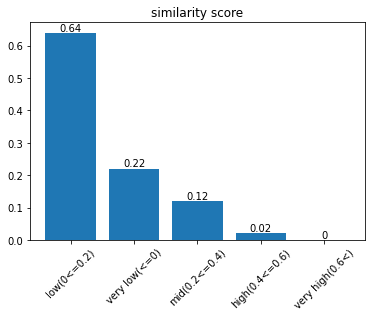

In [7]:
bar_graph(df['sts_q'],'similarity score')

In [45]:
colors = ['#0B1D77','#0045A5','#0A69C1','#198AC5','#27A9B5']

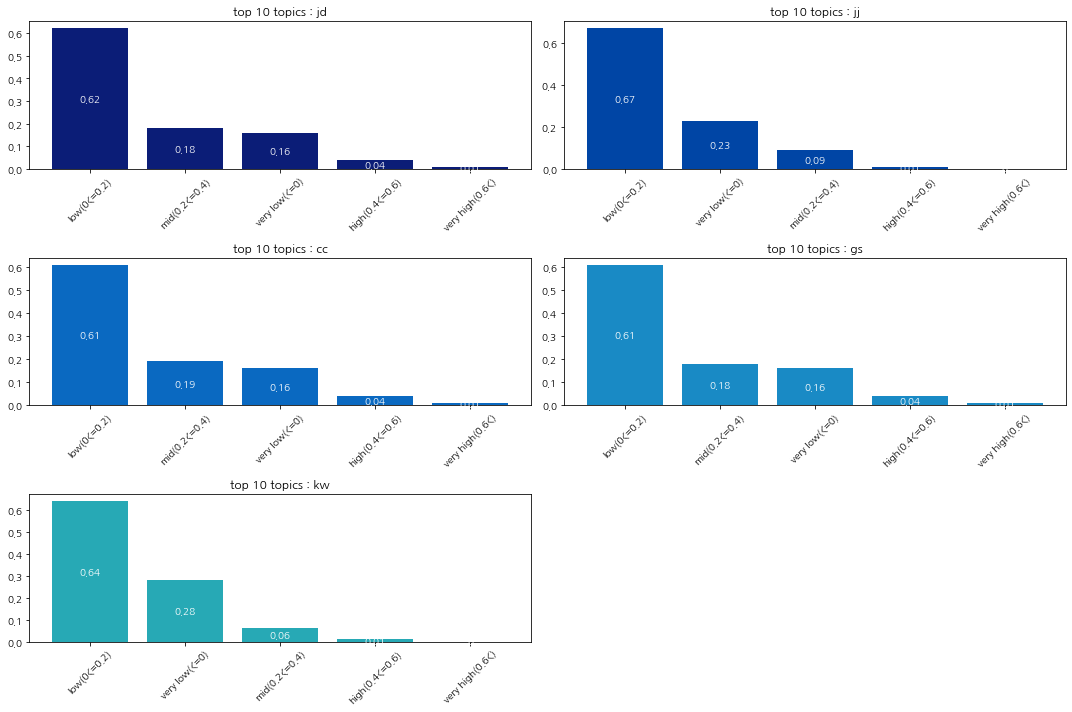

In [54]:
# 지역별로 분포 유사도 확인

data = df.groupby('reg')['sts_q'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp, color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

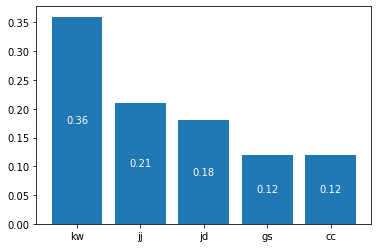

In [9]:
data = df.reg.value_counts(normalize=True).round(2)
fig, ax= plt.subplots()
bar = ax.bar(data.index, data)
ax.bar_label(bar, label_type ='center', color = 'white')
plt.show()

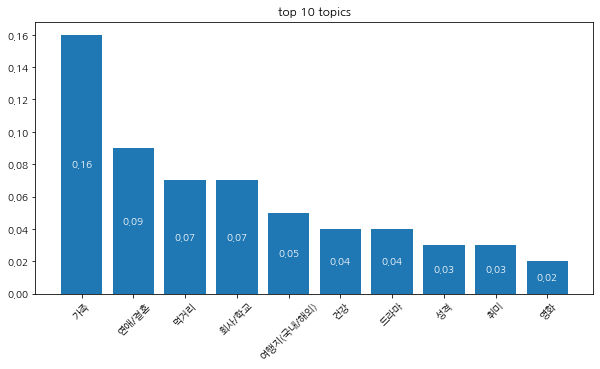

In [10]:
plt.rcParams.update({'font.family': 'NanumGothic'})
data = df.topic.value_counts(normalize=True).head(10).round(2)
fig, ax= plt.subplots(figsize=(10,5))
bar = ax.bar(data.index, data)
ax.bar_label(bar, label_type ='center', color = 'white')
plt.xticks(rotation=45)
plt.title("top 10 topics")
plt.show()

In [41]:
most_freq_topics = df.topic.value_counts(normalize=True).multiply(100).round(2).head(10)
tup_ = [list(zip(most_freq_topics.index,most_freq_topics))]
tup_

[[('가족', 16.43),
  ('연애/결혼', 8.81),
  ('먹거리', 6.87),
  ('회사/학교', 6.83),
  ('여행지(국내/해외)', 4.74),
  ('건강', 4.39),
  ('드라마', 4.33),
  ('성격', 2.95),
  ('취미', 2.94),
  ('영화', 2.39)]]

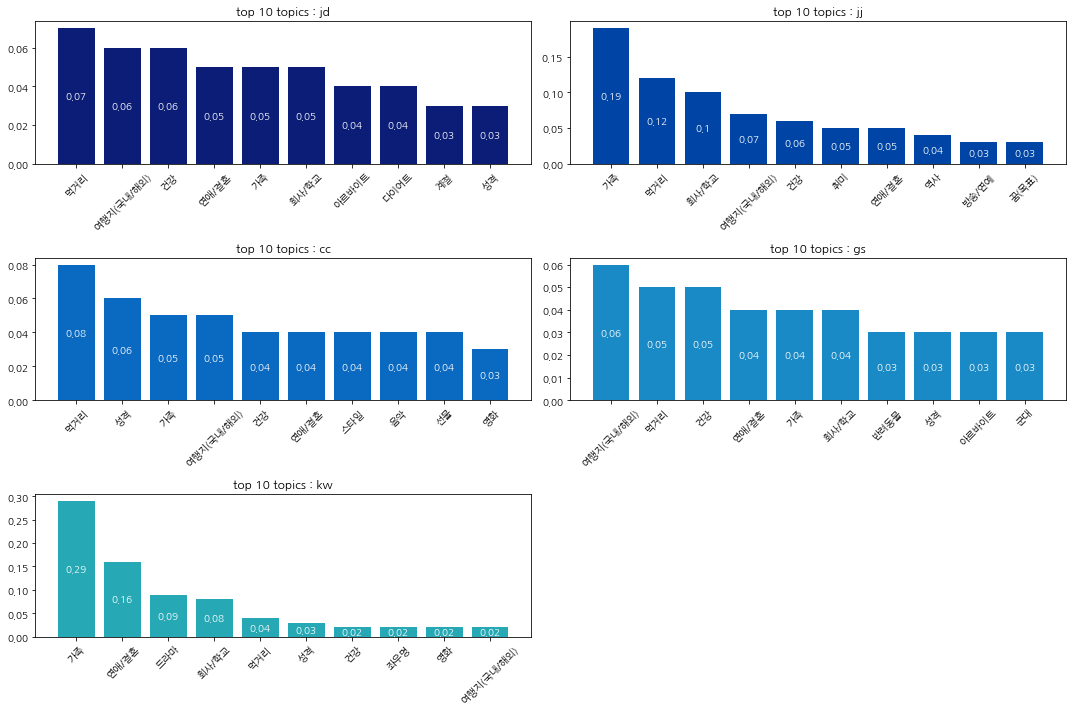

In [46]:
data = df.groupby('reg')['topic'].value_counts(normalize=True).unstack()
regs = df.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp, color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# doc 기준 분석

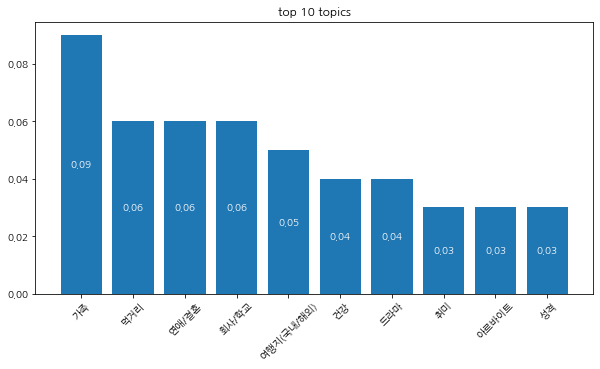

In [36]:
data = dt.topic.value_counts(normalize=True).head(10).round(2)
fig, ax= plt.subplots(figsize=(10,5))
bar = ax.bar(data.index, data)
ax.bar_label(bar, label_type ='center', color = 'white')
plt.xticks(rotation=45)
plt.title("top 10 topics")
plt.show()

In [30]:
dt = df.loc[:,['title','topic','reg','age','curr_res','sex']].copy()
dt.drop_duplicates(subset='title',inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30295 entries, 0 to 949884
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     30295 non-null  object
 1   topic     30295 non-null  object
 2   reg       30295 non-null  object
 3   age       30295 non-null  object
 4   curr_res  30295 non-null  object
 5   sex       30295 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [31]:
dt.reg.value_counts()

gs    7552
jd    7170
cc    5903
jj    5033
kw    4637
Name: reg, dtype: int64

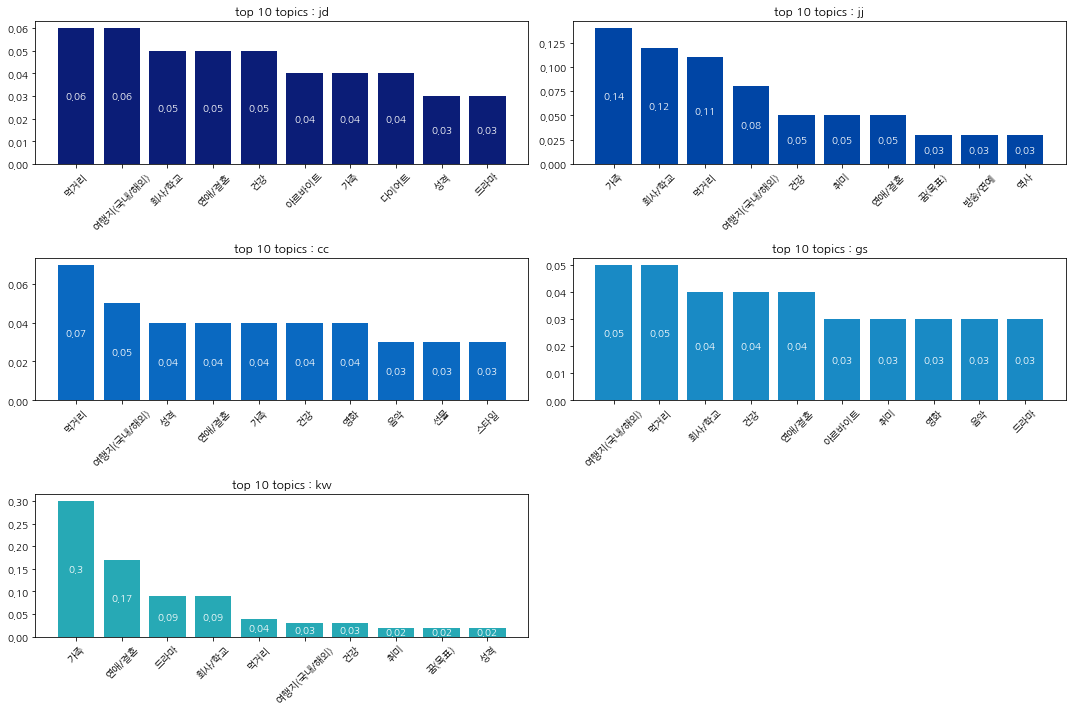

In [47]:
data = dt.groupby('reg')['topic'].value_counts(normalize=True).unstack()
regs = dt.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp,color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"top 10 topics : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

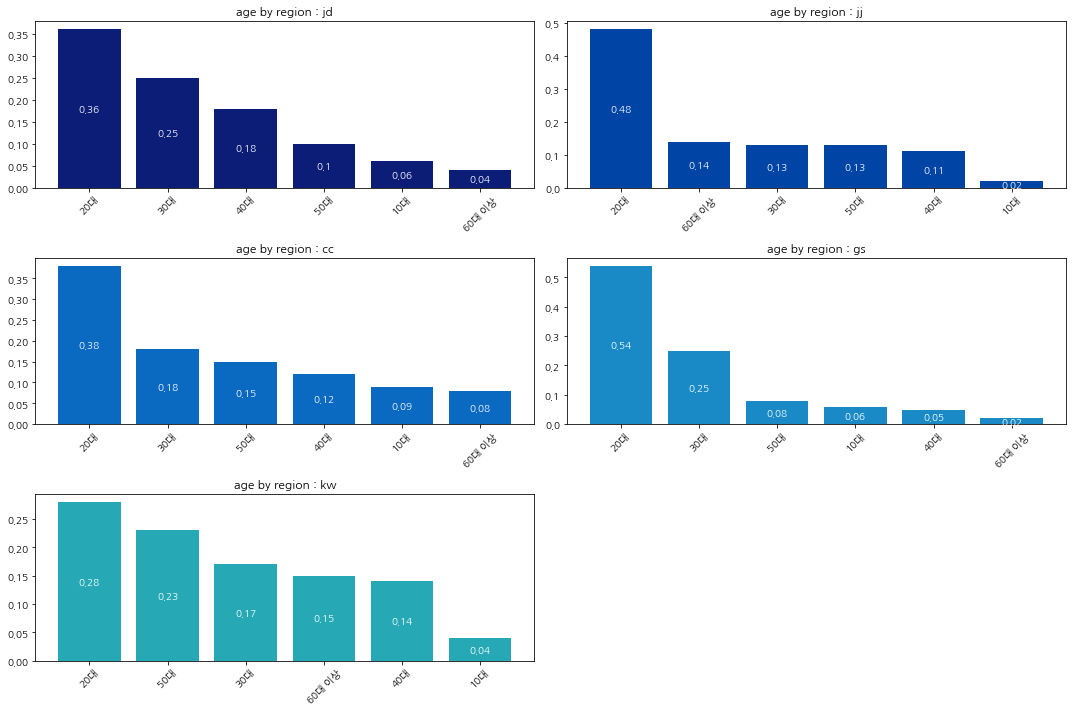

In [53]:
data = dt.groupby('reg')['age'].value_counts(normalize=True).unstack()
regs = dt.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp, color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"age by region : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

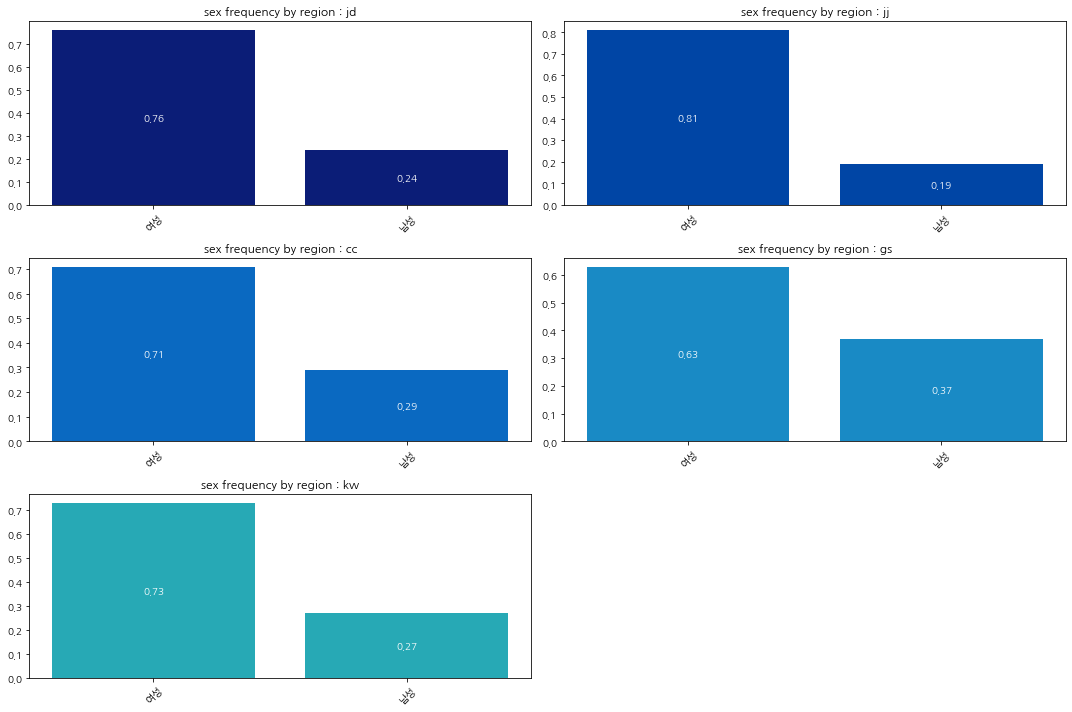

In [52]:
data = dt.groupby('reg')['sex'].value_counts(normalize=True).unstack()
regs = dt.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp, color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"sex frequency by region : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

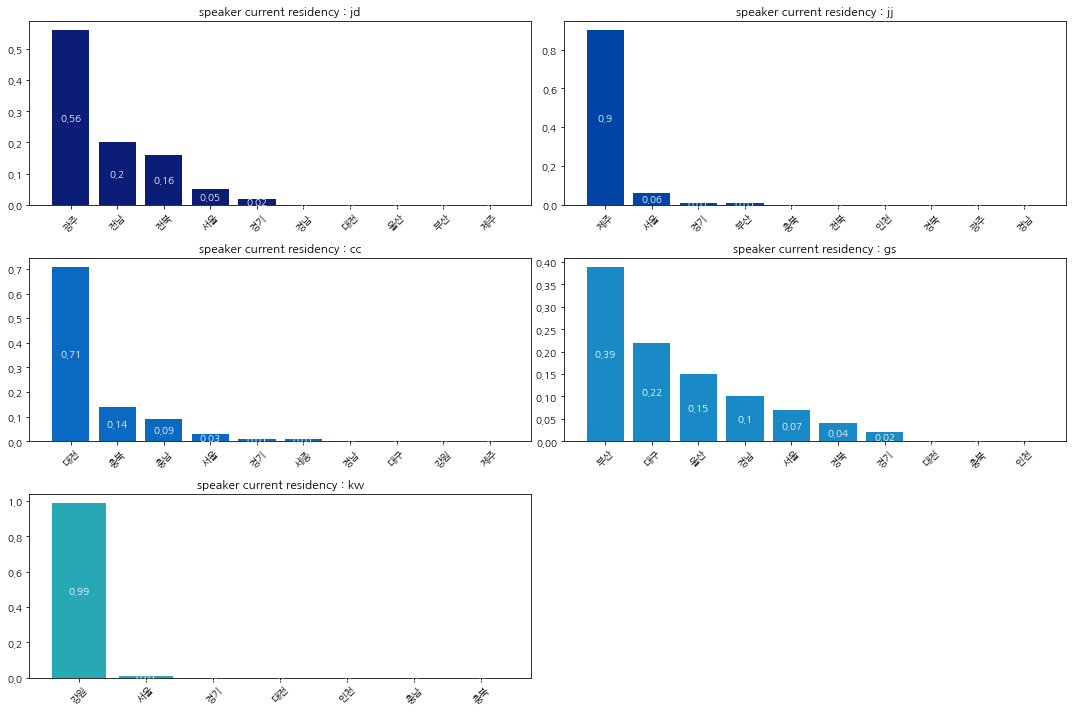

In [51]:
data = dt.groupby('reg')['curr_res'].value_counts(normalize=True).unstack()
regs = dt.reg.unique()
data.loc['cc'].sort_values(ascending=False).head(10)

plt.figure(figsize=(15,10))
for i,reg in enumerate(regs) :
    ax = plt.subplot(3,2,i+1)
    temp = data.loc[reg].sort_values(ascending=False).round(2).head(10)
    bar = ax.bar(temp.index, temp, color=colors[i])
    ax.bar_label(bar, label_type ='center', color = 'white')
    plt.title(f"speaker current residency : {reg}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()